In [153]:
# some notes

# monthly buying basis still has WEEKLY entries in COST
# Impression -> Open -> Click [For EMAILS]

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)


# TODO: 
# Find out how to plot each of the AdTypes by Impressions vs Week and have it sum to total impressions 

In [224]:
# Cleaning
df = pd.read_csv("dataset/Advertising.csv", low_memory = False, usecols = lambda c: not c.startswith("Unnamed:"), parse_dates = ['Week'])
df['Year'] = pd.DatetimeIndex(df['Week']).year
df['Month'] = pd.DatetimeIndex(df['Week']).month
df['Num_Week'] = pd.DatetimeIndex(df['Week']).weekofyear
df["BuyingBasis"].replace('instance', 'Instance', inplace = True)
# filling null values for engagement and impressions
df['Engagement'] = df['Engagement'].fillna(0)
df['Impressions'] = df['Impressions'].fillna(0)


print(df.isnull().sum())

# num_week gives warning but im not sure what it means yet to be honest

Week           0
Impressions    0
Clicks         0
Engagement     0
Opens          0
Leads          0
Segment        0
Season         0
CountryISO     0
CountryName    0
Region         0
SubRegion      0
Publication    0
AdType         0
Treatment      0
BuyingBasis    0
Cost           0
Year           0
Month          0
Num_Week       0
dtype: int64


/tmp/ipykernel_252/2473983206.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Num_Week'] = pd.DatetimeIndex(df['Week']).weekofyear


    Clicks         Cost               Treatment
19      94     0.000000                 Bespoke
18     209     0.000000                 Bespoke
24     228   286.130590       Newsletter banner
70      49   300.179520         Newsletter text
69      96   300.179520         Newsletter text
27     454   312.579656  Newsletter advertorial
23     211   313.186171             Advertorial
43      43   345.714674             Advertorial
42      27   345.714674             Advertorial
35      31   381.420822       Newsletter banner
34       2   381.420822       Newsletter banner
33      36   381.420822       Newsletter banner
32       3   381.420822       Newsletter banner
54      68   609.739650       Newsletter banner
63     284   609.739650       Newsletter banner
80     288   613.908810       Newsletter banner
81    1217   613.908810         Newsletter text
78     283   625.374000         Newsletter text
4      249   625.374000       Newsletter banner
5      139   625.374000       Newsletter

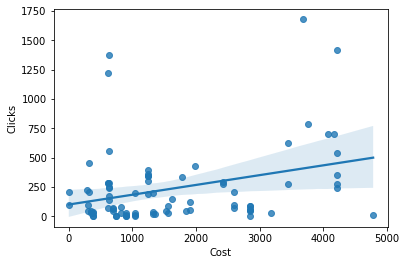

In [226]:
df_country = df.loc[(df['CountryName'] == 'Italy') & (df['AdType'] == "Email")].reset_index(drop = True)

sns.regplot(x = df_country['Cost'], y = df_country["Clicks"])
#plt.show()

print(df_country[['Clicks', 'Cost', 'Treatment']].sort_values(by = ['Cost']))